In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("ames_house.csv")

# Print dataset properties
print("Head:\n", data.head())
print("\nShape:", data.shape)
print("\nColumns:", data.columns)
print("\nData Types:\n", data.dtypes)
print("\nInfo:\n", data.info())
print("\nValue Counts:\n", data["SalePrice"].value_counts())


Head:
   BldgType CentralAir  SalePrice
0     1Fam          Y     215000
1     1Fam          Y     105000
2     1Fam          Y     172000
3     1Fam          Y     244000
4     1Fam          Y     189900

Shape: (2930, 3)

Columns: Index(['BldgType', 'CentralAir', 'SalePrice'], dtype='object')

Data Types:
 BldgType      object
CentralAir    object
SalePrice      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 3 columns):
BldgType      2930 non-null object
CentralAir    2930 non-null object
SalePrice     2930 non-null int64
dtypes: int64(1), object(2)
memory usage: 68.8+ KB

Info:
 None

Value Counts:
 135000    34
140000    33
130000    29
155000    28
145000    26
160000    23
110000    21
185000    21
115000    20
170000    20
120000    20
127000    20
190000    19
200000    19
125000    19
150000    18
165000    17
128000    17
143000    17
180000    17
139000    17
250000    16
144000    16
147000    15
148000    1

In [2]:
#step2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split into X (features) and y (target)
X = data.drop(["BldgType", "CentralAir"], axis=1)
y = data["SalePrice"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit a Linear Regression model and make predictions
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("\nMSE:", mse)



MSE: 1.7203551162685396e-22


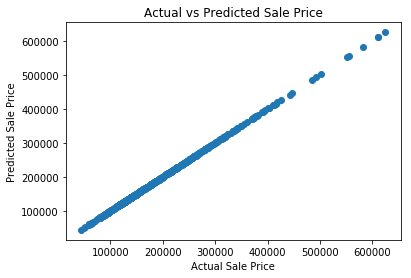

In [4]:
#step 3
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.show()


In [5]:
#step4
# Perform one-hot encoding on categorical columns
data_encoded = pd.get_dummies(data, columns=["BldgType", "CentralAir"])

# Proceed with the rest of your analysis based on the modified 'data_encoded'
# Remember to redefine X and y based on the updated dataset if needed.


In [17]:
#step5
# Assuming you've already done the one-hot encoding in the previous step
# Split the updated dataset into features (X) and target (y)
X_encoded = data_encoded.drop("SalePrice", axis=1)
y_encoded = data_encoded["SalePrice"]

# Split the encoded dataset into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.25, random_state=42)

# Fit a Linear Regression model and make predictions
model_encoded = LinearRegression()
model_encoded.fit(X_train_encoded, y_train_encoded)
y_pred_encoded = model_encoded.predict(X_test_encoded)

# Compute Mean Squared Error
mse_encoded = mean_squared_error(y_test_encoded, y_pred_encoded)
print("\nMSE with Categorical Features:", mse_encoded)



MSE with Categorical Features: 6703989148.047893


In [15]:
#step6
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Fit a Linear Regression model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_encoded)
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Compute Mean Squared Error
mse_scaled = mean_squared_error(y_test_encoded, y_pred_scaled)
print("\nMSE with Standard Scaling:", mse_scaled)



MSE with Standard Scaling: 6703989148.047893


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  import sys


In [8]:
#step7
from sklearn.preprocessing import MinMaxScaler

# Min-max scaling on the data
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train_encoded)
X_test_minmax = minmax_scaler.transform(X_test_encoded)

# Fit a Linear Regression model on min-max scaled data
model_minmax = LinearRegression()
model_minmax.fit(X_train_minmax, y_train_encoded)
y_pred_minmax = model_minmax.predict(X_test_minmax)

# Compute Mean Squared Error
mse_minmax = mean_squared_error(y_test_encoded, y_pred_minmax)
print("\nMSE with MinMax Scaling:", mse_minmax)



MSE with MinMax Scaling: 6703989148.047893


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
#step8
from sklearn.linear_model import SGDRegressor

# Use SGDRegressor on standardized data
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_regressor.fit(X_train_scaled, y_train_encoded)
y_pred_sgd = sgd_regressor.predict(X_test_scaled)

# Compute Mean Squared Error
mse_sgd = mean_squared_error(y_test_encoded, y_pred_sgd)
print("\nMSE using SGD Regressor:", mse_sgd)



MSE using SGD Regressor: 6692884540.37156


In [23]:
#step 9
import numpy as np

# Assuming you have already calculated the MSE values for each scenario



# RMSE with OHE and Standard Scaling
rmse_with_ohe_standard = np.sqrt(mse_scaled)
print("RMSE with OHE and Standard Scaling:", rmse_with_ohe_standard)

# RMSE with OHE and MinMax Scaling
rmse_with_ohe_minmax = np.sqrt(mse_minmax)
print("RMSE with OHE and MinMax Scaling:", rmse_with_ohe_minmax)

# RMSE of SGD Regressor with OHE and Standard Scaler
rmse_sgd = np.sqrt(mse_sgd)
print("RMSE of SGD Regressor with OHE and Standard Scaler:", rmse_sgd)

# RMSE of RidgeCV with OHE and Standard Scaler
rmse_ridge = np.sqrt(mse_ridge)
print("RMSE of RidgeCV with OHE and Standard Scaler:", rmse_ridge)

# RMSE of LassoCV with OHE and Standard Scaler
rmse_lasso = np.sqrt(mse_lasso)
print("RMSE of LassoCV with OHE and Standard Scaler:", rmse_lasso)


RMSE with OHE and Standard Scaling: 81877.89169273897
RMSE with OHE and MinMax Scaling: 81877.89169273897
RMSE of SGD Regressor with OHE and Standard Scaler: 81810.05158519068
RMSE of RidgeCV with OHE and Standard Scaler: 81878.62449896659
RMSE of LassoCV with OHE and Standard Scaler: 81894.14962113512
